# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Directory where test data is loaded from
TEST_DATA_DIR = 'data/sim_2022_04_12'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_04_19_02.pt'

# Number of units in RNN
NUM_UNITS = 100

## Load test data

In [3]:
sim_params, vel, pos = motion.load_simulation_results(TEST_DATA_DIR)

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t[0].detach().numpy()

## Plot results

In [6]:
if sim_params['boundary_type'] == 'square':
    boundary = motion.SquareBoundary(sim_params['boundary_height'])
else:
    raise ValueError(f'Boundary not supported.')

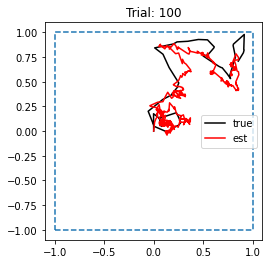

In [14]:
trial_plt = 100

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
motion.plot_position_estimate(boundary, pos[trial_plt], pos_est[trial_plt], ax)

In [8]:
for name, param in model.rnn.named_parameters():
    print(name)
    print(param)
    

weight_ih_l0
Parameter containing:
tensor([[-0.1718,  1.5483],
        [-0.1292, -0.4102],
        [-0.3061,  0.1642],
        [-0.9936, -0.3581],
        [ 0.3181, -0.1996],
        [-1.0557, -0.0293],
        [-0.2818,  0.0152],
        [ 0.7478, -0.0121],
        [ 0.6135, -0.2598],
        [-0.6551,  0.2139],
        [ 1.5744,  1.0382],
        [-0.0790,  0.1000],
        [-0.5369, -1.4560],
        [ 0.4031,  0.3581],
        [-0.4964,  0.1069],
        [ 0.2016, -0.3155],
        [ 0.5400,  1.0037],
        [ 0.7430, -0.0561],
        [ 0.3918,  0.5284],
        [ 0.4819, -0.8015],
        [-1.1654, -0.3105],
        [-0.9738,  0.7287],
        [-0.4013, -0.2670],
        [-0.0506,  0.0024],
        [-0.6532,  0.7388],
        [ 1.1310, -0.5003],
        [-0.5994,  0.3990],
        [ 0.1111, -0.3393],
        [ 0.4710,  0.0225],
        [-0.5873, -0.8143],
        [ 0.0457,  0.2726],
        [-0.1574,  0.5393],
        [-0.2725, -0.8273],
        [-0.4589, -0.6130],
        [-0.0

In [9]:
print(model.rnn.get_parameter('weight_hh_l0'))

Parameter containing:
tensor([[-0.0791,  0.0570, -0.2346,  ...,  0.1522,  0.3451, -0.0789],
        [ 0.0609,  0.0202,  0.0609,  ..., -0.0459,  0.1595, -0.0309],
        [-0.0070,  0.1194,  0.0923,  ...,  0.2861,  0.0075, -0.0498],
        ...,
        [ 0.2048,  0.0139, -0.0823,  ...,  0.0499,  0.0496, -0.1584],
        [-0.0112,  0.0208,  0.1436,  ..., -0.0102, -0.1217,  0.0436],
        [ 0.0449, -0.0121,  0.3255,  ...,  0.0579,  0.0233, -0.0883]],
       requires_grad=True)
